# BdG Equations in 1D (HFB)

Here we present some examples of solving the BdG equations (Hartree-Fock_Bogoliubov or HFB) for fermions in 1D.

The 1D system is not a very good model for physics (mean-field theory works better in higher dimensions) but contains all of the ingredients of the 3D theory in a form that can be quickly simulated.

<!-- END_TEASER -->

In [2]:
import mmf_setup;mmf_setup.nbinit(hgroot=False)
from mmfutils.contexts import NoInterrupt

<IPython.core.display.Javascript object>

In order to work with Python 3+, we need to take care of those obsolete functions, the \$reload$  is not a built function for Python 3

In [3]:
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

# HFB Theory (BCS Superconductivity)

## <font color='green'>The Variational Mean-field Method</font>

Here is how I tend to view the mean-field approximation.  It is not the only way of thinking about things, but satisfies my notion of being well defined and general.  It is based on the following theorem from [Feynman:1998]:

**Theorem:** The thermodynamic potential $F$ of a given system described by the Hamiltonian $\op{H}$ is bounded:

$$
  F \leq F_0 + \braket{\op{H} - \op{H}_0}_0
$$

where $F_0$ is the thermodynamic potential of the system described by the Hamiltonian $\op{H}_0$ and the average $\braket{}_0$ is performed with respect to the thermal ensemble of $\op{H}_0$:

$$
  \braket{\op{A}}_0 = \frac{\Tr\bigl[\op{A}e^{-\beta\op{H}_0}\bigr]}{\Tr e^{-\beta\op{H}_0}}
$$

What this means is that we can choose any Hamiltonian $\op{H}_0$ for which we can exactly solve the problem, and use it to obtain a variational upper bound on the thermodynamic potential $F$.  A general strategy is thus to introduce some solvable Hamiltonian $\op{H}_0$ that depends on some parameters, then choose these parameters so as to minimize the right-hand size of the previous equation.

[Feynman:1998]: http://search.perseusbooksgroup.com/book/paperback/statistical-mechanics/9780201360769 'Richard P. Feynman, "Statistical Mechanics: A Set of Lectures", (1998)'

## Alternative Formulation

Another solution to this problem has a nice formulation in terms of an energy density functional $E[\mat{R}]$ as a function of the full density matrix $\mat{R}$ which we may express in terms of the minimization problem:

$$
  \min_\mat{R} \Bigl\{
    E(\mat{R}) + T \Tr \bigl[\mat{R}\ln \mat{R}  + (\mat{1} - \mat{R})\ln(\mat{1}-\mat{R})\bigr]
    \Bigr\}, \qquad
    \Tr \mat{R} = 1, \qquad
    \mat{R} = \mat{R}^\dagger.
$$

The solution is

$$
  \mat{R} = f_\beta(\mat{H}) = \frac{1}{1+e^{\beta \mat{H}}}, \qquad
  \beta = \frac{1}{k_B T}, \qquad
  \mat{H} = \frac{\delta E[\mat{R}]}{\delta \mat{R}^T}.
$$

# <font color='orange'>BCS Theory</font>

We start with standard BCS theory, which is the HFB approximation to the following family of Hamiltonions:

$$
  \op{H} = \sum_{k} \left(
    E^{a}_{k}\op{a}_{k}^\dagger\op{a}_{k}
    +
    E^{b}_{k}\op{b}_{k}^\dagger\op{b}_{k}
  \right)
  +
  \int\d{x}\d{y}\; V(x-y)\op{n}_{a}(x)\op{n}_{b}(y).
$$

This describes two species of particle ($a$, and $b$) interacting with a potential $V(x-y)$.

We first applying the Feynman variational principle, considering a trial Hamiltonian of the form:

$$
  \op{H}_0 = \sum_{k>0} 
  \begin{pmatrix}
    \op{a}_{k}^\dagger &
    \op{b}_{-k}\\    
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    E^{a}_{k} - \Sigma^a_k & \Delta_k\\
    \Delta^*_{k} & -E^{b}_{-k} + \Sigma^b_{-k}   
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \op{a}_{k}\\
    \op{b}_{-k}^\dagger
  \end{pmatrix}.
$$

Here we will consider the self-energies $\Sigma$ and pairing gap $\Delta$ as variational parameters.

## <font color='green'>Diagonalization</font>

Consider diagonalizing the quadratic Hamiltonian

$$
  \op{H}_0 = \op{\Psi}^\dagger \cdot \mat{M} \cdot \op{\Psi}
           = \op{C}^\dagger\cdot\diag{E}\cdot\op{C}, \qquad
  \mat{U}^\dagger\cdot\mat{M}\cdot\mat{U} = \diag(E), \qquad
  \op{\Psi} = \mat{U} \cdot \op{C}.
$$

This Hamiltonian is diagonal in terms of the quasi-particle operators $\op{c}_n$ and so the vacuum state will occupy these (independent) levels with probability $f_\beta(E_n)$:

$$
  \braket{\op{c}_m^\dagger\op{c}_n} = \delta_{mn}f_\beta(E_n).
$$

We can arrange this in matrix form by noting that $f_\beta(E) + f_\beta(-E) = 1$:

$$
  \braket{\op{C}\op{C}^\dagger}
  = \mat{1} - \braket{\op{C}^\dagger\op{C}}
  = \mat{1} - f_\beta\bigl(\diag(E)\bigr) = f_\beta\bigl(-\diag(E)\bigr),\\
  \braket{\op{\Psi}\op{\Psi}^\dagger} 
    = \mat{U}\cdot\braket{\op{C}\op{C}^\dagger}\cdot\mat{U}^\dagger
    = f_\beta(-\mat{M}) = \mat{1} - f_\beta(\mat{M})
    = \mat{1} - \mat{R}.
$$

For standard BCS theory, we have 

$$
  \op{\Psi} = \begin{pmatrix}
    \op{a}\\
    \op{b}^\dagger
  \end{pmatrix}, \qquad
  \diag[f_\beta(-\mat{M})] = \begin{pmatrix}
    \braket{\op{a}\op{a}^\dagger} = 1-n_a \\
    \braket{\op{b}^\dagger\op{b}} = n_b
  \end{pmatrix}
$$

for example.

## <font color='green'>Homogeneous Matter</font>

For homogeneous matter, momentum $p = \hbar k$ is a good quantum number, and so we can label all eigenstates of the system with the wavenumber $k$.  To describe two component superfluids, we introduce the quadratic Hamiltonian

$$
  \op{H}_0(k) = \op{\Psi}^\dagger_{k} \cdot \mat{H}_{k} \cdot \op{\Psi}_{k}
$$

where $\op{\Psi}_k = (\op{a}_{k}, \op{b}_{-k}^\dagger)$ and 

$$
  \mat{H}_{k} = \begin{pmatrix}
    A & \Delta \\
    \Delta^\dagger & -B
  \end{pmatrix}
$$

with $A$ and $B$ are the dispersion relationships for the two particles:

$$
  A = \frac{\hbar^2k^2}{2m_A} - \mu_A.
$$

This quadratic Hamiltonian can be "solved" by diagonalizing the matrix with a unitary matrix $\mat{U}$:

$$
  \mat{U}^\dagger\mat{H}\mat{U} = \diag(E_-, E_+).
$$

Once this is done, we end up with a diagonal Hamiltonian

$$
  \op{H}_0 = \op{C}^\dagger \begin{pmatrix}
    E_-\\
    & E_+
  \end{pmatrix}
  \op{C}
  = E_- \op{c}_-^\dagger\op{c}_- + E_+ \op{c}_+^\dagger\op{c}_+
$$

where $\op{c}_{\pm}$ are the creation operators for fermionic "quasiparticles", which are linear combinations of the original particles $\op{a}$ and $\op{b}^\dagger$.  Since the Hamiltonian is now diagonal, the thermal ensemble can be simply presented in terms of the Fermi distribution and inverse temperature $\beta = 1/k_BT$:

$$
  f_{\beta}(E) = \frac{1}{1+e^{\beta E}}.
$$

Note: The energy $E$ here will contain the chemical potential $E-\mu$.

## <font color='green'>Inhomogeneous Systems</font>

For inhomogeneous systems, the same approach works, but one cannot use momentum as a good quantum number.  Thus, the Hamiltonian $\mat{H}$ will simply need to be diagonalized into a complete set of states:

$$
  \mat{H}_0\cdot \vect{U}_{\pm n} = \vect{U}_{\pm n}E_{\pm n}, \qquad
  \vect{U}_{\pm n} = 
  \begin{pmatrix}
    u_{\pm n} \\
    v^*_{\pm n}
  \end{pmatrix}.
$$

The columns of the matrix $\mat{U}$ are these eigenvectors.

# Homogeneous Matter

## <font color='orange'> Exact Solution (Gaudin)</font>

The homogeneous equations for a two-component Fermi gas with short-range interactions $v_0 \delta(x-y)$ are known exactly from the Gaudin equations [Gaudin:1967] which give the numerical solution [Casas:1991]:

$$
  F(x) = 2 - \frac{K}{\pi}\int_{-1}^{1} dy\; \frac{F(y)}{1+K^2(x-y)^2}\\
  \frac{1}{\lambda}= \frac{K}{\pi}\int_{-1}^{1}dy\;F(y)\\
  \frac{E_0(N)/N}{\abs{E_0(2)/2}} = -1 + \frac{4}{\pi}K^3\lambda\int_{-1}^{1}dy\; y^2F(y),
$$

where $E_0(2) = -mv_0^2/4\hbar^2$ is the two-body binding energy and $\lambda = mv_0/\hbar^2/\rho$ is the dimensionless coupling constant. This solution is only valid in homogeneous matter, but should give some idea of how well mean-field techniques work.  A direct comparison with the BCS solution [Quick:1993] shows that there are significant disagreements in the strong-coupling regime $0 < \lambda ^{-1} < 1$.

[Gaudin:1967]: http://dx.doi.org/10.1016/0375-9601(67)90193-4 'M. Gaudin, "Un Systeme a Une Dimension de Fermions en Interaction", Phys. Lett. A24(1), 55-56 (1967)'
[Casas:1991]: http://dx.doi.org/10.1103/PhysRevA.44.4915 'M. Casas, C. Esebbag, A. Extremera, J. M. Getino, M. de Llano, A. Plastino, and H. Rubio, "Cooper pairing in a soluble one-dimensional many-fermion model", Phys. Rev. A 44(8), 4915--4922 (1991)'
[Quick:1993]: http://dx.doi.org/10.1103/PhysRevB.47.11512 'R. M. Quick, C. Esebbag, and M. de Llano, "BCS theory tested in an exactly solvable fermion fluid", Phys. Rev. B 47, 11512--11514 (1993)'

To compare results note that [Quick:1993] and [Casas:1991] use the dimensionless $\epsilon = E(N)/\abs{E_0(N)}$ where $E_0(N)$ is the energy of $N$ particles in the zero-density limit.  I.e. where one has $N/2$ dimers, each with energy $E_0(2)$.  Thus $E_0(N) = E_0(2) N/2$.  The interaction strength is expressed in terms of $\lambda^{-1} \propto n$.

In [4]:
%pylab inline --no-import-all

def gaudin(K, N=64, tol=1e-6):
    """Return `E, lam` for exact Gaudin solution in box"""
    x = np.linspace(-1, 1, N)
    
    F0 = 0*x
    F1 = 2 - F0

    n = 0
    while abs(F0-F1).max() > tol:
        F0 = F1
        F1 = 2.0 - K/np.pi * np.trapz(
            F0[None, :]/(1+K**2*(x[:,None] - x[None,:])**2), x, axis=1)
        n += 1
    lam = np.pi / K / np.trapz(F1, x)
    e = -1 + 4./np.pi*K**3*lam * np.trapz(x**2*F1, x)
    return e, lam

Populating the interactive namespace from numpy and matplotlib


In [5]:
gaudin(1.0)

(0.3855702104019485, 1.1362343507927228)

In [6]:
# Test the series expansion
e, lam = gaudin(0.001)
(e - (-1.0 + np.pi**2/12/(lam)**2 + np.pi**2/24/(lam)**3))

1.5206977899140384e-09

## <font color='orange'>The Local Density Approximation (LDA) at T=0</font>

The solution for homogeneous states within HFB theory is called the Local Density Approximation (LDA).  For non-uniform systems, one treats each region of space as if it were locally homogeneous, using this solution with a spatially dependent chemical potential.  Here we present the equations for the LDA for a homogeneous gas of equal numbers of two fermionic species interacing with a delta-function interactions $V(x-y) = v_0\delta(x-y)$.  The gap equations have the form (see for example [Quick:1993]):

$$
  \Delta = v_0 \nu = \frac{v_0}{2}\int\frac{\d{k}}{2\pi}\;\frac{\Delta}{\sqrt{\epsilon_+^2 + \Delta^2}},\quad
  n_+ = \frac{N_a + N_b}{L} = \int\frac{\d{k}}{2\pi}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right],\quad
  \epsilon_+ = \frac{\hbar^2k^2}{2m} - \frac{1}{2}n_+v_0 - \mu = \frac{\hbar^2k^2}{2m} - \mu_{\text{eff}},\\
  \frac{E}{L} = 
  \int\frac{\d{k}}{2\pi} \frac{\hbar^2k^2}{2m}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  - v_0(n_an_b + \nu^\dagger\nu)
  = 
  \int\frac{\d{k}}{2\pi} \frac{\hbar^2k^2}{2m}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  - \frac{v_0 n_+^2}{4}
  - \frac{\abs{\Delta}^2}{v_0}.
$$

where $\mu = \mu_0 - V_\text{ext}$ is the effective local chemical potential.  These are easily solved by choosing $\Delta$ and $\mu_\mathrm{eff}$, then integrating to determine $v_0$, $n_+$, and $\mu$.

[Quick:1993]: http://dx.doi.org/10.1103/PhysRevB.47.11512 'R. M. Quick, C. Esebbag, and M. de Llano, "BCS theory tested in an exactly solvable fermion fluid", Phys. Rev. B 47, 11512--11514 (1993)'

<font color='red'>** To perform these integrals numerically, we need to deal with potential singularities.  As $\Delta \rightarrow 0$, there is a potential singularity when $\epsilon_+(k) = 0$ i.e. when $k = k_F$.  This is easily dealt with by breaking the integrand up into regions $(0, k_F) \cup (k_F, \infty)$.  One might occasionally have problems with the energy integral at large $k$.** </font>

## <font color='green'>LDA at finite T</font>

We now generalize these results to finite temperature and allow for asymmetry.  Here we will obtain occupation numbers described by the Fermi distribution function

$$
  f(E) \equiv f_\beta(E) = \frac{1}{1 + e^{\beta E}} = \frac{1-\tanh(\beta E/2)}{2}, 
  \qquad \beta = \frac{1}{k_B T}, \qquad
  f(E) + f(-E) = 1,
$$

The BdG equations follow from the single-particle Hamiltonian (assuming homogeneous states)

$$
  \begin{pmatrix}
    \epsilon_k^{\uparrow} & \Delta\\
    \Delta & -\epsilon_{-k}^{\downarrow}
  \end{pmatrix}
$$

**where** 

$$
  \epsilon_k^{\uparrow} = \frac{k^2}{2m}  - \mu_\uparrow, \\
  \epsilon_{-k}^{\downarrow} = \frac{k^2}{2m} - \mu_\downarrow.
$$

which has eigenvectors and eigenvalues

Then
$$
  \omega_{\pm} = \epsilon^{-}_k \pm E_k, \qquad
  E_k = \sqrt{(\epsilon^{+}_k)^2 + \Delta^2}, \qquad
  \epsilon^{\pm}_{k} = \frac{\epsilon^\uparrow_k \pm \epsilon^\downarrow_{-k}}{2},\\
  \epsilon^{\uparrow}_k = K^{\uparrow}_{k} - v_0n^{\downarrow} - \mu^{\uparrow} 
                      = K^{\uparrow}_{k} - \mu^{\uparrow}_{\text{eff}},\\
  \epsilon^{\downarrow}_{-k} = K^{\downarrow}_{-k} - v_0n^{\uparrow} - \mu^{\downarrow} 
                      = K^{\downarrow}_{-k} - \mu^{\downarrow}_{\text{eff}},\\
  \abs{u^{\pm}_k}^2 = \frac{1\pm\epsilon^+_k/E_k}{2}, \qquad
  \abs{v^{\pm}_k}^2 = \frac{1\mp\epsilon^+_k/E_k}{2},
$$

**if we may assume** 
$
\epsilon_k^{\uparrow} =\epsilon_{-k}^{\downarrow}
$, **then** $\omega_- = -\omega_+$

 **Let $n_+$ is the total particle number, while $n_-$ is the number difference**
 
\begin{align}
  n_+ 
  &= n(\epsilon_+)+n(\epsilon_-)\\
  &= \int\frac{\d{k}}{2\pi}\left(
    1 - \frac{\epsilon^+_k}{2E_k}
    \left[\tanh(\beta\omega_+/2) - \tanh(\beta\omega_-/2)\right]
  \right)\\
  &= \int\frac{\d{k}}{2\pi}\left(
    1 - \frac{\epsilon^+_k}{E_k}
    \bigl(f(\omega_-) - f(\omega_+)\bigr)\right),\\
  n_- 
  &= n(\epsilon_+)-n(\epsilon_-)\\
  &= \int\frac{\d{k}}{2\pi}\left(
      - \frac{1}{2}\left[
    \tanh(\beta\omega_+/2) + \tanh(\beta\omega_-/2)
  \right]\right)\\
  &= \int\frac{\d{k}}{2\pi}
  \bigl(f(\omega_+) - f(-\omega_-)\bigr),\\
    \Delta 
  &= \frac{v_0}{2}\int \frac{\d{k}}{2\pi}\frac{\Delta}{E_k}\frac{\left[\tanh(\beta\omega_+/2) - \tanh(\beta\omega_-/2)\right]}{2},\\
  &= \frac{v_0}{2}\int \frac{\d{k}}{2\pi}\frac{\Delta}{E_k}\bigl(f(\omega_-)-f(\omega_+)\bigr),\\
  \frac{1}{v_0} 
  &= \frac{1}{2}\int \frac{\d{k}}{2\pi}\frac{1}{E_k}\bigl(f(\omega_-)-f(\omega_+)\bigr).
\end{align}

To match our review paper...

$$
  n_+ = 
  1 - \frac{\epsilon^+_k}{E_k}\bigl(f(\omega_-) - f(\omega_+)\bigr)\\
  = 
  1 - \frac{\epsilon^+_k}{E_k}(1 - 2\bar{f}(E_k))\\
  = 
  1 - \frac{\epsilon^+_k}{E_k} 
  + 2\frac{\epsilon^+_k}{E_k}\bar{f}(E_k))
$$
**I changed the first $\omega_-$ to $\omega_+$ for $\bar{f}(E_k)$:**

$$
  \bar{f}(E_k) = \frac{f(E_k + \epsilon_+) + f(E_k - \epsilon_-)}{2}\\
  1 - 2\bar{f}(E_k)
  = f(\omega_-) - f(\omega_+)
$$

## <font color='green'>3D case</font>

In 3D case, all integration should be done in 3 dimensions. $d^3k$ is the volumn. If the $k_z$ in the $z$ direction is different from other tow dimensions($k_\perp$ ), we pick the cylindrical coordinate: $d^3k$ = $2{\pi}k_{\perp}d{k_z}dk_\perp $(where the integration over $d\theta$ is carried out and equal to $2\pi$), 
\begin{align}
  n_+ 
  &= n(\epsilon_+)+n(\epsilon_-)\\
  &= \int\frac{\d^3{k}}{8{\pi}^3}\left(
    1 - \frac{\epsilon^+_k}{2E_k}
    \left[\tanh(\beta\omega_+/2) - \tanh(\beta\omega_-/2)\right]
  \right)\\
  &= \int\frac{k_{\perp}d{k_z}dk_{\perp}}{4{\pi}^2}\left(
    1 - \frac{\epsilon^+_k}{E_k}
    \bigl(f(\omega_-) - f(\omega_+)\bigr)\right),\\
  n_- 
  &= n(\epsilon_+)-n(\epsilon_-)\\
  &= \int\frac{k_{\perp}d{k_z}dk_{\perp}}{4{\pi}^2}\left(
      - \frac{1}{2}\left[
    \tanh(\beta\omega_+/2) + \tanh(\beta\omega_-/2)
  \right]\right)\\
  &= \int\frac{k_{\perp}d{k_z}dk_{\perp}}{4{\pi}^2}
  \bigl(f(\omega_+) - f(-\omega_-)\bigr),\\
  \frac{1}{v_0} 
  &=\frac{m}{4\pi a}-\sum_{k}{{\frac{1}{2\epsilon^+_k}}}\\
  &=\sum_{k}{\left[\frac{1}{2\epsilon^+_k}-\frac{1-2\bar{f}(E_k)}{2E_k}\right]}-\sum_{k}{{\frac{1}{2\epsilon^+_k}}}\\
  &=\sum_{k}{\left[-\frac{1-2\bar{f}(E_k)}{2E_k}\right]}\\
  &=-\int\frac{k_{\perp}d{k_z}dk_{\perp}}{4{\pi}^2}{\left[\frac{1-f(E_k + \epsilon_+) + f(E_k - \epsilon_-)}{2E_k}\right]}\\
\end{align}

In [7]:
import homogeneous;reload(homogeneous)
from homogeneous import get_BCS_v_n_e, Homogeneous1D

res0 = get_BCS_v_n_e(mu_eff=1.2, delta=3.4)

h = Homogeneous1D(T=10.0)
res1 = h.get_BCS_v_n_e(mus_eff=(1.2,)*2, delta=3.4)
(res0, res1)

c:\program files\python36\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
E:\Projects\Physics\quantum-fermion-theories\quantum-turbulence\homogeneous.py:136: RuntimeWarning: overflow encountered in exp
  return 1./(1+np.exp(E/self.T))


(BCS_Results(v_0=4.15862415484364, n=0.9994111444130727, mu=-0.8780876628880645, e=-1.5652560299212273),
 BCS_Results(v_0=10.3575534373504, ns=array([0.82712125, 0.82712125]), mus=array([-7.36695259, -7.36695259])))

## <font color='orange'>Inhomogeneous States</font>

We now present the solution for inhomogeneous states.

$$
  \epsilon_k^{\uparrow} = \frac{k_\perp^2}{2m} + 2t[1-\cos(k_z d)] - \mu_\uparrow, \qquad
  \epsilon_k^{\downarrow} = \frac{k^2}{2m} - \mu_\downarrow.
$$

The dispersion relationship here is a bit of a misnomer.  There low-energy states are just the single Bloch band $\abs{k_z} \leq \pi/d$.  The other bands are much higher separated by a large gap.

The BdG equations follow from the single-particle Hamiltonian (assuming homogeneous states)

$$
  \begin{pmatrix}
    \epsilon_k^{\uparrow} & \Delta\\
    \Delta & -\epsilon_k^{\downarrow}
  \end{pmatrix}
$$

which has eigenvectors and eigenvalues

$$
  \omega_{\pm} = \epsilon^{-}_k \pm E_k, \qquad
  E_k = \sqrt{(\epsilon^{+}_k)^2 + \Delta^2}, \\
  \epsilon^{\pm}_{k} = \frac{\epsilon^\uparrow_k \pm \epsilon^\downarrow_k}{2}\\
  \abs{u^{\pm}_k}^2 = \frac{1\pm\epsilon^+_k/E_k}{2}, \qquad
  \abs{v^{\pm}_k}^2 = \frac{1\mp\epsilon^+_k/E_k}{2},\\
  n_+ = 1 - \frac{\epsilon^+_k}{2E_k}\left[\tanh(\beta\omega_+/2) - \tanh(\beta\omega_-/2)\right], \qquad
  n_- = - \frac{1}{2}\left[\tanh(\beta\omega_+/2) + \tanh(\beta\omega_-/2)\right]\\
  \Delta = -g\int \frac{\d^{3}\vect{k}}{(2\pi)^3}\frac{\Delta}{2E_k}\frac{\left[\tanh(\beta\omega_+/2) - \tanh(\beta\omega_-/2)\right]}{2}
$$

## BCS Code

### <font color='green'>Single-Particle Hamiltonian Matrix</font>

$$
  \mat{H} = \begin{pmatrix}
    -\frac{\hbar^2 k^2}{2m} - \mu_a +V_a & -\Delta\\
    -\Delta^\dagger & -\left(-\frac{\hbar^2 k^2}{2m} - \mu_b +V_b\right)
  \end{pmatrix}, \qquad
  \op{\Psi} = \begin{pmatrix}
    \op{a}_{k}\\
    \op{b}^\dagger_{-k}
  \end{pmatrix}.
$$

The application of the kinetic energy would be as follows:

$$
  \DeclareMathOperator{\FFT}{FFT}
  \psi(x) = 
  -\frac{\hbar^2\nabla_x^2\psi(x)}{2m} 
  = \FFT^{-1}\Bigl(\frac{\hbar^2k^2}{2m}\overbrace{\FFT(\psi)}^{\int \d{x}\; e^{-\I k x}\psi(x)}\Bigr)
  = \int\frac{\d{k}}{(2\pi)}\; e^{\I k x} \Bigl(\frac{\hbar^2k^2}{2m} \int\d{y}\; e^{-\I k y}\psi(y) \Bigr)\\
  = \int\frac{\d{k}}{(2\pi)}\d{y}\; \frac{e^{\I k (x-y)}\hbar^2k^2}{2m} \psi(y).
$$

$$
  \FFT[\psi(x)] = \int\d{x}\; e^{-\I k x}\psi(x) = \frac{L}{N}\sum_{n} e^{-\I k x_n}\psi(x_n),\\
  \FFT^{-1}(\psi_k) = \int\frac{\d{k}}{(2\pi)}\; e^{\I k x}\psi_k = \frac{1}{L}\sum_{m} e^{\I k_m x}\psi_{k_m}.
$$

When doing both the FFT and the IFFT, the factors of $L$ cancel and we are left with an overall factor of $1/N$.  This can be split into two factors of $1/\sqrt{N}$:

$$
  \FFT^{-1}\Bigl(f(k)\FFT(\psi)\Bigr) = \mat{U}^{-1}\cdot \diag(f_k) \cdot \mat{U} \cdot \psi
  = \sum_{xy}(U_{xk}^* f_k U_{ky}\psi_y).
$$

Thus, the kinetic energy matrix is:

$$
  \mat{K}_{xy} = \frac{1}{N}\frac{e^{\I k (x-y)}\hbar^2k^2}{2m}.
$$


$$
  U_{kx} = \frac{1}{\sqrt{N}}e^{-\I k x}, \qquad
  \mat{U}^{-1} = \mat{U}^\dagger.
$$

Even all the above looks right to me, to get the code level, I have to struggle a lot to fully appreciate how it works.
To better understand the way how the kenectic matrix is presented, let dig a bit more to the detail of how linear aglbra works here, let say the kenitic operator is $\vec{T})$, from above derivation, we got:

$$
\vec{T}\psi(x)=\frac{1}{N}\sum_{ky}{e^{ikx-iky}f(k)}\psi(y)
$$

the varibles $x$ and $k$ are spatial and wave-vector points. Pick one specific spatial position $x_1$, then

\begin{align}
\vec{T}\psi(x)|_{x=x1}
&=\frac{1}{N}\sum_{ky}{e^{ikx_1-iky}f(k)}\phi(y)\\
&=\frac{1}{N}\sum_{k}{e^{ikx_1}f(k)}\left[e^{-iky_1}\psi(y_1)+e^{-iky_2}\psi(y_2)+...+ e^{-iky_N}\psi(y_N)\right]
\end{align}

for different values of $x={x_1,x_2,...x_N}$, we have:
\begin{align}
\vec{T}\psi(x)|_{x=x_1}=\frac{1}{N}\sum_{k}{e^{ikx_1}f(k)}\left[e^{-iky_1}\psi(y_1)+e^{-iky_2}\psi(y_2)+...+ e^{-iky_N}\psi(y_N)\right]\\
\vec{T}\psi(x)|_{x=x_2}=\frac{1}{N}\sum_{k}{e^{ikx_2}f(k)}\left[e^{-iky_1}\psi(y_1)+e^{-iky_2}\psi(y_2)+...+ e^{-iky_N}\psi(y_N)\right]\\
\vdots\\
\vec{T}\psi(x)|_{x=x_N}=\frac{1}{N}\sum_{k}{e^{ikx_N}f(k)}\left[e^{-iky_1}\psi(y_1)+e^{-iky_2}\psi(y_2)+...+ e^{-iky_N}\psi(y_N)\right]\\
\end{align}
The above result is can be put as a matrix times a column vector:

$$
  \begin{pmatrix}
    \vec{T}\psi(x)|_{x=x_1}\\
    \vec{T}\psi(x)|_{x=x_2}\\
    \vdots\\
    \vec{T}\psi(x)|_{x=x_N}\\
  \end{pmatrix} = \frac{1}{N}\begin{pmatrix}
    \sum_{k}{e^{ikx_1}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_1}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_1}e^{-iky_N}f(k)}\\
    \sum_{k}{e^{ikx_2}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_2}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_2}e^{-iky_N}f(k)}\\
    \vdots\\
    \sum_{k}{e^{ikx_N}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_N}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_N}e^{-iky_N}f(k)}\\
  \end{pmatrix}
 \begin{pmatrix}
    \psi(y_1)\\
    \psi(y_2)\\
    \vdots\\
    \psi(y_N)\\
  \end{pmatrix}.
$$

The RHS matrix can be further decompose into three matrices:
$$
 \begin{pmatrix}
    \sum_{k}{e^{ikx_1}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_1}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_1}e^{-iky_N}f(k)}\\
    \sum_{k}{e^{ikx_2}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_2}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_2}e^{-iky_N}f(k)}\\
    \vdots\\
    \sum_{k}{e^{ikx_N}e^{-iky_1}f(k)} & \sum_{k}{e^{ikx_N}e^{-iky_2}f(k)}&...&\sum_{k}{e^{ikx_N}e^{-iky_N}f(k)}\\
  \end{pmatrix}=
   \begin{pmatrix}
    e^{ik_1x_1} & e^{ik_2x_1}&...&e^{ik_Nx_1}\\
    e^{ik_1x_2} & e^{ik_2x_2}&...&e^{ik_Nx_2}\\
    \vdots\\
    e^{ik_1x_N} & e^{ik_2x_N}&...&e^{ik_Nx_N}\\
  \end{pmatrix}
  \begin{pmatrix}
    f(k_1) & 0&...&0\\
    0 & f(k_2)&...&0\\
    \vdots\\
    0 & 0&...&f(k_N)\\
  \end{pmatrix}
 \begin{pmatrix}
    e^{-ik_1y_1} & e^{-ik_1y_2}&...&e^{-ik_1y_N}\\
    e^{-ik_2y_1} & e^{-ik_2y_2}&...&e^{-ik_2y_N}\\
    \vdots\\
    e^{-ik_Ny_1} & e^{-ik_Ny_2}&...&e^{-ik_Ny_N}\\
  \end{pmatrix}
$$


Now I convince myself that the kinetic matrix can be put as:
\begin{align}
T&=U^\dagger\times diag[f(k)]\times U\\
U&=\frac{1}{\sqrt{N}}e^{-kx}\\
U&=\frac{1}{\sqrt{N}}
\begin{pmatrix}
    e^{-ik_1x_1} & e^{-ik_1x_2}&...&e^{-ik_1x_N}\\
    e^{-ik_2x_1} & e^{-ik_2x_2}&...&e^{-ik_2x_N}\\
    \vdots\\
    e^{-ik_Nx_1} & e^{-ik_Nx_2}&...&e^{-ik_Nx_N}\\
  \end{pmatrix}
\end{align}

Or expanded as a row vector times a column vector:
$$
U = e^{-i\begin{pmatrix}
   k_1\\k_2\\\vdots\\k_N\\
  \end{pmatrix}\times  
  \begin{pmatrix}
   x_1&x_2&...&x_N\\
  \end{pmatrix}
  }
$$

$$
  \Delta = v_0 \nu = \frac{v_0}{2}\int\frac{\d{k}}{2\pi}\;\frac{\Delta}{\sqrt{\epsilon_+^2 + \Delta^2}},\quad
  n_+ = \frac{N_a + N_b}{L} = \int\frac{\d{k}}{2\pi}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right],\quad
  \epsilon_+ = \frac{\hbar^2k^2}{2m} - \frac{1}{2}n_+v_0 - \mu = \frac{\hbar^2k^2}{2m} - \mu_{\text{eff}},\\
  \frac{E}{L} = 
  \int\frac{\d{k}}{2\pi} \frac{\hbar^2k^2}{2m}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  - v_0(n_an_b + \nu^\dagger\nu)
  = 
  \int\frac{\d{k}}{2\pi} \frac{\hbar^2k^2}{2m}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  - \frac{v_0 n_+^2}{4}
  - \frac{\abs{\Delta}^2}{v_0}.
$$



## <font color='orange'> Error Analysis</font>

We start with the base BCS class which solves the problem in a 1D periodic universe.  This class will form the base for subsequent work, but is limited by the issue discussed above with discrete $k_n$.  As we shall see, there are two forms of errors: UV errors resulting from a limited $k_\max = \pi N/L$ and IR errors from the discrete $\d{k} = \pi/L$.  To estimate the UV errors, we consider the asymptotic form of the integrals:

$$
  \delta_{UV}\Delta = \frac{v_0}{2}\overbrace{2}^{\pm k}\int_{k_\max}^{\infty}
    \frac{\d{k}}{2\pi}\;\frac{\Delta}{\sqrt{\epsilon_+^2 + \Delta^2}} 
  \approx v_0\int_{k_\max}^{\infty} \frac{\d{k}}{2\pi}\;\frac{2m\Delta}{\hbar^2k^2}
  = \frac{v_0m\Delta}{\pi\hbar^2k_\max} + \frac{2v_0 m^2\mu_\mathrm{eff}}{3\pi\hbar^4k_\max^3},\\
  \delta_{UV}n_+ = 2\int_{k_\max}^{\infty}\frac{\d{k}}{2\pi}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  \approx \int_{k_\max}^{\infty}\frac{\d{k}}{2\pi}
    \frac{4m^2\abs{\Delta}^2}{\hbar^4k^4}
  = \frac{2m^2\abs{\Delta}^2}{3\pi\hbar^4k_{\max}^3} 
    + \frac{8m^3\mu_{\mathrm{eff}}\abs{\Delta}^2}{5\pi \hbar^6 k_\max^5}
$$

The error in $\Delta$ is largest, so we can set the lattice spacing to achieve the desired accuracy:

$$
  \frac{L}{N} \lesssim \frac{\pi^2\hbar^2}{v_0 m}\frac{\delta_{UV}\Delta}{\Delta}.
$$

Estimating the IR errors is more difficult: they arise from the variations of the integrand over the range $\d{k}$:

$$
  \frac{1}{\d{k}}\int_{-\d{k}/2}^{\d{k}/2}\d{k_b}\left\{
    \frac{\d{k}}{2\pi}\sum_{n}f(k_n + k_b)
  \right\} 
  \approx
  \frac{1}{\d{k}}\int_{-\d{k}/2}^{\d{k}/2}\d{k_b}\left\{
    \frac{\d{k}}{2\pi}\sum_{n}\left[f(k_n) + k_bf'(k_n) + \frac{k_b^2}{2}f''(k_n)\right]
  \right\}\\
  =
    \frac{\d{k}}{2\pi}\sum_{n}
    \left\{
      f(k_n)
      +
      \frac{\d{k}^2}{24}f''(k_n)
  \right\}.
$$

We thus expect the error to scale like 

$$
  \delta_{IR} \sim \frac{\d{k}^2}{24} = \frac{\pi^2}{3L^2}
$$

but the coefficient is difficult to calculate.

### <font color='green'> Twist-Averaged Boundary Conditions(TBC)</font>

For many-body wave function in periodic boundary conditions, one may assume the phase of the wavefunction returns to the same wavlue when a particle goes around the boundaries and returns to its original position. [Lin:2001] points out that such assumption may lead to a slow-down of converge for deloclized fermion systems, due to the shell efficts in the filling of single particle states. So to alleviate the shell effect, we allow the overall many-body wave funtions to pick up a phase when particles in the system wrap around the periodic boundaries:
$$
\Psi(r_1+L\hat{x},r_2,...)=e^{i\theta_x}\Psi(r_1,r_2...)
$$
Generally, the $\theta$ is restirced in the range:
$$
-\pi<\theta_x\le\pi
$$

Then the twist average of any oberserable is defined:
$$
\braket{\hat{A}}=(2\pi)^{-d} \int_{-\pi}^{\pi} d\theta\braket{\psi(R,\theta)|\hat{A}|\psi(R,\theta)}
$$

Numerically, we will only sample some values of $\theta$ and avaerage over the results, such method may be well enough. One can also randomly displace the origin of the grid for a number of time during compuation..

In [8]:
%pylab inline --no-import-all
import bcs;reload(bcs)
import homogeneous;reload(homogeneous)

delta = 1.0
mu_eff = 1.0
m = 1.0
v_0, n, mu, e_0 = homogeneous.get_BCS_v_n_e(delta=delta, mu_eff=mu_eff)

N_twist = 2

def get_err(N, L, N_twist=1):
    b = bcs.BCS(T=0, N=N, L=L)
    R = b.get_R(mus=(mu_eff, mu_eff), delta=delta, N_twist=N_twist)
    na = np.diag(R)[:N]/b.dx
    nb = (1 - np.diag(R)[N:])/b.dx
    kappa = - np.diag(R[:N, N:])/b.dx

    k_max = np.pi*N/L
    dn_UV = 2*b.m**2*delta**2/3/np.pi/k_max**3 + 8*b.m**3*mu_eff*delta**2/5/np.pi/k_max**5
    dd_UV = v_0*b.m*delta/np.pi/k_max + 2*v_0*b.m**2*mu_eff/3/np.pi/k_max**3
    return [[na[0].real + nb[0].real, -v_0*kappa[0].real],[dn_UV, dd_UV]]

def get_errs(Ns, Ls, N_twist=1):
    Ns, Ls = np.asarray(Ns), np.asarray(Ls)
    res_NL = []
    res_UV = []
    for L in Ls:
        res_NL_ = []
        res_UV_ = []
        for N in Ns:
            n_d, d_UV = get_err(N=N, L=L, N_twist=N_twist)
            res_NL_.append(n_d)
            res_UV_.append(d_UV)
        res_NL.append(res_NL_)
        res_UV.append(res_UV_)
    return np.array([res_NL, res_UV])

Populating the interactive namespace from numpy and matplotlib


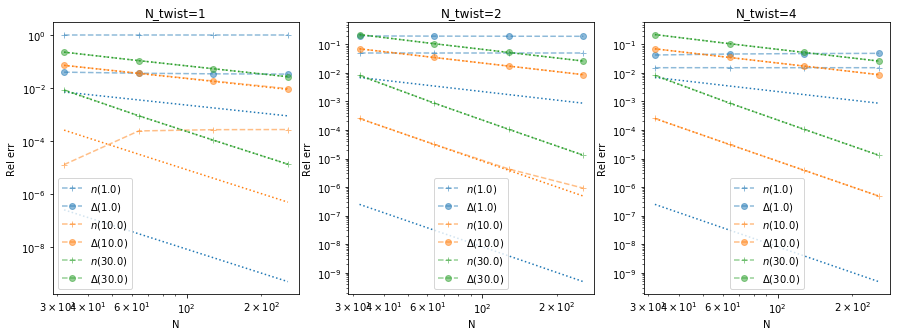

In [9]:
Ns = 2**np.arange(5, 9)
Ls = [1.0, 10.0, 30.0]
N_twists = [1, 2, 4]
plt.figure(figsize=(5*len(N_twists), 5))
for _n, N_twist in enumerate(N_twists):
    res_NL, res_UV = get_errs(Ns=Ns, Ls=Ls, N_twist=N_twist)
    n_, d_ = np.array(res_NL).T
    plt.subplot(101 + len(N_twists)*10 + _n)
    for _i, L in enumerate(Ls):
        _l, = plt.loglog(Ns, abs(n_[:, _i]-n)/n, '--+', label='$n({})$'.format(L), alpha=0.5)
        plt.loglog(Ns, abs(d_[:, _i]-delta)/delta, '--o', c=_l.get_c(),
                   label=r'$\Delta({})$'.format(L), alpha=0.5)
        plt.loglog(Ns, abs(res_UV[_i, :, 0])/n, ':', c=_l.get_c())
        plt.loglog(Ns, abs(res_UV[_i, :, 1])/delta, ':', c=_l.get_c())
    plt.ylabel('Rel err')
    plt.xlabel('N')
    plt.legend()
    plt.title("N_twist={}".format(N_twist))

This plot shows that our estimates of the UV errors is accurate, that the UV errors in $\Delta$ dominate, and that $L\approx 25$ is required for reasonable IR convergence.  The following plot shows that the IR errors are quite complicated in structure (shell effects).  Fortunately, we can reduce these errors by explicitly performing the **Bloch (twist) averaging**  (see examples [Lin:2001] ,[Kolorenc:2011]) as we shall describe below.


[Lin:2001]: https://arxiv.org/pdf/cond-mat/0101339.pdf 'Twist-averaged Boundary Conditions in Continuum Quantum Monte Carlo'

[Kolorenc:2011]: http://www.giovannibachelet.it/MitasRPP2011a.pdf 'Applications of quantum Monte Carlo methods in condensed systems'

Suppose we want a tolerance of $\delta \ln \Delta < 10^{-4}$, then we must have $L/N < 4.5$.  Computationally, we can conveniently work with $N=2^{10} = 1024$, so $L < 0.46$.

In [10]:
2**10*np.pi**2/v_0/m*1e-4

0.45909828128498303

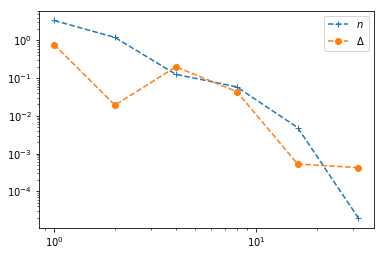

In [11]:
L = 0.46
N = 2**8
N_twists = 2**np.arange(0,6)

res = np.array([get_err(N=N, L=L, N_twist=N_twist)[0]
                for N_twist in N_twists])
plt.loglog(N_twists, abs(res[:,0] - n)/n, '--+', label='$n$')
plt.loglog(N_twists, abs(res[:,1] - delta)/delta, '--o', label=r'$\Delta$')
plt.legend()

This plot shows that we need about $2^5=32$ points in the twist average to accurately determine the results.

In [12]:
Ls = np.linspace(10.0, 30.0, 20)
res = []
for L in Ls:
    b = bcs.BCS(T=0, N=2**10, L=L)
    N = b.N
    R = b.get_R(mus=(mu_eff, mu_eff), delta=delta)
    na = np.diag(R)[:N]/b.dx
    nb = (1 - np.diag(R)[N:])/b.dx
    kappa = - np.diag(R[:N, N:])/b.dx
    #na, nb, kappa
    res.append((na[0].real + nb[0].real, -v_0*kappa[0].real))
n_, d_ = np.array(res).T

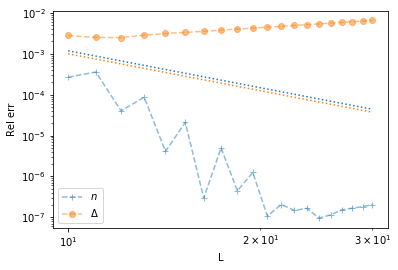

In [13]:
_l_n, = plt.loglog(Ls, abs(n_-n)/n, '--+', label='$n$', alpha=0.5)
_l_d, = plt.loglog(Ls, abs(d_-delta)/delta, '--o', label=r'$\Delta$', alpha=0.5)
plt.loglog(Ls, abs(1./Ls**3)/n, ':', c=_l_n.get_c())
plt.loglog(Ls, abs(1./Ls**3)/delta, ':', c=_l_d.get_c())

plt.ylabel('Rel err')
plt.xlabel('L')
plt.legend()

## <font color='Orange'>Regularization</font>

As discussed above, the converges of the gap equation is quite poor in 1D.  In 3D the situation is even worse and the gap equation diverges.  To deal with this, some sort of regularization condition is needed.  There are two common stratgies:

1. Fixed scattering length.  Here the approach is to replace the coupling constant $v_0$ with some physical observable such as the two-body scattering length.  The idea is to calculate the two-body scattering length $a_s$ using some convenient potential (with an appropriate regulator such as an energy cutoff $E_c$ or a lattice momentum cutoff $k_c$).  Then, adjust the coupling constant $v_0(E_c)$ as a function of this cutoff to hold the physical observable $a_s$ fixed.

   $$
   $$

To relate with Braaten and Hammer (2006) [Physics Reports 428 (2006) 259 – 390], we identify $g_2 = -v_0$.  (Equations are numbered as in the paper.)  Next, calculate the s-wave scattering $a(g_2, \Lambda)$ as a function of the interaction strength and cutoff:

\begin{gather}
  \frac{1}{a} - \frac{2\Lambda}{\pi} = \frac{8\pi}{g_2} \tag{305}.
\end{gather}

Next, rearrange the gap equation in terms of $8\pi/g_2$:

$$
  \frac{8\pi}{g_2} = \frac{1}{a} - \frac{2\Lambda}{\pi} = -\frac{8\pi}{2}\int\frac{\d{k}^3}{(2\pi)^3}\;\frac{1}{\sqrt{\epsilon_+^2 + \Delta^2}}.
$$

Now substitute for your expression of $\Lambda$.  The divergences should cancel levaing a convergent equation that is valid in the limit of $\Lambda \rightarrow \infty$.  (Since we have not worked this out yet, we work backwards to cancel the divergence.)

$$
  \frac{1}{a} = \frac{2\Lambda}{\pi} - \frac{8\pi}{2}\int_{k < k_c}\frac{\d{k}^3}{(2\pi)^3}\;\frac{1}{\sqrt{\epsilon_+^2 + \Delta^2}}
  = \frac{8\pi}{2}\int_{k < k_c}\frac{\d{k}^3}{(2\pi)^3}\;\left(
  \frac{1}{E_+} - \frac{1}{\sqrt{\epsilon_+^2 + \Delta^2}}
  \right)\\
  E_+ = \frac{\hbar^2k^2}{2m}, \qquad
  \Lambda = 2\pi^2\int_{k< k_c}\frac{\d{k}^3}{(2\pi)^3}\;\frac{1}{E_+}
          = 2\pi^2\int_{k< k_c}\frac{\d{k}^3}{(2\pi)^3}\;\frac{2m}{\hbar^2k^2}
          = \frac{2m}{\hbar^2}k_c
$$

2. The second improvement due to Aurel Bulgac is to note that you can do the integrals with $1/\epsilon_+ = 1/(E_+ - \mu + \I 0^+)$ instead of $1/E_+$, which improves the order of convergence further.  Basically, this redefines the cutoff in terms of $k_c$ which satisfies:

   $$
     E_c = \frac{\hbar^2k_c^2}{2m} - \mu
   $$

   instead of $E_c = \hbar^2k_c^2/2m$ which is done above, effectively changing the meaning of $\Lambda$.

3. Aurel's approach works with density dependent $\mu(x)$ etc.

#### More details

From the work of [A Bulgac, MMN Forbes, P Magierski](https://arxiv.org/abs/1008.3933) pp 41, and with a cutoff $k_c$, the relation betweem the scattering length $a$ and the potential strength can be written:
\begin{align}
\frac{m}{4\pi\hbar^2 a}
&=\frac{1}{g} + \frac{1}{2}\int_{0\le k \le k_c}\frac{d^3k}{(2\pi)^3}\frac{1}{\frac{\hbar^2 k^2}{2m} +i0^+}\\
&=\frac{1}{g}+\frac{m}{2\hbar^2\pi^2}k_c \tag{83}
\end{align}

For a given scattering length $a$, we got an effective $g_e$,so:
$$
\frac{1}{g_e}= \frac{m}{4\pi\hbar^2a}-\frac{mk_c}{2\hbar^2\pi^2}
$$

To match the result from equation 305, the above can be mutiplied by a factor for both side to get:
$$
\frac{8\pi}{g_e}=\frac{2m}{\hbar^2 a} - \frac{4mk_c}{\hbar^2\pi}
$$
By setting $m=\hbar=1$,it becomes:
$$
\frac{8\pi}{g_e}=\frac{2}{a} - \frac{4k_c}{\pi}
$$

Here we got a factor of 2 for $\frac{1}{a}$ in contrast to the result from  Braaten and Hammer (2006), when compared the one used in the paper we reviewed, they also use the one has a factor of 2, so we will stick to this relation instead of  Braaten and Hammer (2006).

# <font color='green'>Band Structure</font>

We now consider the [Kronig–Penney model](https://en.wikipedia.org/wiki/Particle_in_a_one-dimensional_lattice#Kronig–Penney_model) for a potential barrier of width $b$ separating wells by height $V_0>0$ and period $L$.  The solution for the lowest band ($E<V_0$) is:

$$
  \cos k_B L = \cosh \kappa b\cos k (L-b)
  + \frac{\kappa_0^2 - k^2}{2k\kappa_0}\sinh\kappa_0 b\sin k(L-b), \\
  k = \frac{\sqrt{2mE}}{\hbar}, \qquad
  \kappa_0 = \frac{\sqrt{2m(V_0-E)}}{\hbar}.
$$

There may be additional bands with $E<V_0$ but in general, higher bands will have $E>V_0$:

$$
  \cos k_B L = \cos k_0 b\cos k (L-b)
  - \frac{k_0^2 + k^2}{2kk_0}\sin k_0 b\sin k(L-b), \qquad
  k_0 = \frac{\sqrt{2m(E-V_0)}}{\hbar}.
$$

In the tight-binding limit, we expect the first form $E < V_0$ and the dispersion to have the form:

$$
  E(k_B) \approx E_0 + 2t(1-\cos k_B L).
$$

Define as for the optical lattice potential

$$
  k_0 = \frac{\pi}{L}, \qquad E_R = \frac{\hbar^2 k_0^2}{2m}.
$$

Populating the interactive namespace from numpy and matplotlib
0.048825958268028755
0.016211389419352858
0.1600000003610184


c:\program files\python36\lib\site-packages\scipy\optimize\zeros.py:519: ComplexWarning: Casting complex values to real discards the imaginary part
  r = _zeros._brentq(f,a,b,xtol,rtol,maxiter,args,full_output,disp)
c:\program files\python36\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


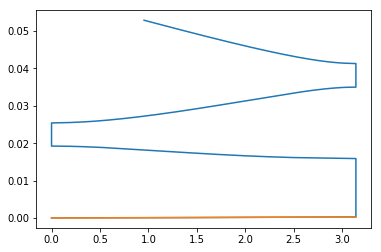

In [14]:
%pylab inline --no-import-all
import scipy.optimize
import scipy as sp
import ad.admath
hbar = k0 = 1.0
m = 0.5
ER = (hbar*k0)**2/2/m
L = np.pi/k0

class KronigPenney(object):
    def __init__(self, V0, b_L):
        self.V0 = V0
        self.b_L = b_L
        
    def rhs(self, E_V0, d=0, np=np):
        V0 = self.V0
        E = E_V0*V0
        if d==1:
            E = ad.adfloat(E)
            np = ad.admath
        else:
            E = E + 0j
        b = self.b_L*L
        k = np.sqrt(2*m*E)/hbar
        kappa0 = np.sqrt(2*m*(V0-E))/hbar
        P = (kappa0**2 - k**2)/2/k/kappa0
        res = (np.cosh(kappa0*b)*np.cos(k*(L-b)) 
               + P*np.sinh(kappa0*b)*np.sin(k*(L-b)))
        if d==0:
            return res
        elif d==1:
            return res.d(E)

    def get_E0_V0(self, E_V0_max=1-1e-12):
        def f(E0_V0):
            return self.rhs(E0_V0) - 1
        return sp.optimize.brentq(f, 1e-12, E_V0_max)
    
    def get_t(self, E0_V0=None):
        if E0_V0 is None:
            E0_V0 = p.get_E0_V0()
        drhs = self.rhs(E0_V0, d=1)
        t_V0 = -0.5/drhs
        return t_V0
    
#p = KronigPenney(V0=35.6879098, b_L=0.1)
p = KronigPenney(V0=15.2196051, b_L=0.9)
#p = KronigPenney(V0=67.3944700, b_L=0.1)
kFL, DeltaEF = 20., 8.
kFL, DeltaEF = 55., 24. 

kF = kFL/L
EF = (hbar*kF)**2/2/m
Delta = DeltaEF*EF

E0_V0 = p.get_E0_V0()
print(E0_V0/p.V0)
t = p.get_t(E0_V0=E0_V0)
print(t)
print(2*m*t*L**2)
E_V0 = E0_V0 + np.linspace(0,1000*t/p.V0,1000)
kL = np.linspace(0, np.pi, 100)
E_unit = EF
plt.plot(np.arccos(p.rhs(E_V0)), (E_V0-E0_V0)*p.V0/E_unit)
plt.plot(kL, 2*t*(1-np.cos(kL))/E_unit)

In the revised paper, they have $2mtd^2 = 0.16$ and $Lk_F = 20-55$ which corresponds to:

$$
  \frac{t}{E_R} = \frac{0.16}{\pi^2} = 0.0162, \qquad
  h \approx 1.69, \qquad
  V_0 = 4h^2E_R = 4h^2E_F\left(\frac{\pi}{d k_F}\right)^2 = 0.28-0.037,\\
  \frac{\Delta}{E_F} \approx 8 - 24, \qquad
  \frac{\mu^{\uparrow}}{E_F} \approx 4 - 11, \qquad
  \frac{\mu^{\downarrow}}{E_F} \approx -4 - -12.5.
$$

Here we present the band structure calculation for a periodic square well potential with period $L$ and barrier $V_0$ extending from $x=0$ to $x=a$.  To find the band structure, we use [Bloch's theorem](https://en.wikipedia.org/wiki/Bloch_wave) that the solution can be expressed as:

$$
  \psi(x) = e^{\I k_B x} u(x), \qquad u(x+L) = u(x).
$$

To formulate the solution, we work with the transfer matrix approach.  At any point $x$ in space, we decompose the wavefunction $u(x) = u_-(x) + u_+(x)$ into a left-moving piece $u_-(x)$ and a right-moving piece $u_+(x)$:

$$
  \vect{U}(x) = \begin{pmatrix}
    u_+(x)\\
    u_-(x)
  \end{pmatrix}.
$$

We then define the transfer matrix $\mat{T}(x, x')$ such that

$$
  \vect{U}(x) = \mat{T}(x, x')\cdot\vect{U}(x').
$$

The transfer matrix over a region where the potential is constant $V(x) = V_0$ is:

$$
  \mat{T}(x,x') = \begin{pmatrix}
    e^{\I k_0 (x-x')}\\
    0 & e^{-\I k_0 (x-x')}
  \end{pmatrix}, \qquad
  \frac{\hbar^2 k_0^2}{2m} = E - V_0.
$$

A little more complicated is the transfer matrix from a region with $k=k$ to a region with $k=k_0$.  Across this jump we must make sure the wavefunction is $C^1$ continuous, thus we have:

$$
  u_+(-\epsilon) + u_-(-\epsilon) = u_+(\epsilon) + u_-(\epsilon), \qquad
  \I k u_+(-\epsilon) - \I k u_-(-\epsilon) = \I k_0 u_+(\epsilon) - \I k_0 u_-(\epsilon).
$$

$$
  u_+(-\epsilon) + u_-(-\epsilon) = u_+(\epsilon) + u_-(\epsilon), \qquad
  \I k u_+(-\epsilon) - \I k u_-(-\epsilon) = \I k_0 u_+(\epsilon) - \I k_0 u_-(\epsilon),\\
  \vect{U}(\epsilon) = \frac{1}{2}
  \begin{pmatrix}
    \overbrace{1+\frac{k}{k_0}}^{\alpha^{+}_{k/k_0}} & \overbrace{1-\frac{k}{k_0}}^{\alpha^{-}_{k/k_0}}\\
    1-\frac{k}{k_0} & 1+\frac{k}{k_0}
  \end{pmatrix}\cdot\vect{U}(-\epsilon).
$$

Likewise, for a transition from a region with $k=k_0$ to a region with $k=k$ we have:

$$
  \vect{U}(\epsilon) = \frac{1}{2}
  \begin{pmatrix}
    \overbrace{1+\frac{k_0}{k}}^{\alpha^{+}_{k_0/k}} & \overbrace{1-\frac{k_0}{k}}^{\alpha^{-}_{k_0/k}}\\
    1-\frac{k_0}{k} & 1+\frac{k_0}{k}
  \end{pmatrix}\cdot\vect{U}(-\epsilon).
$$

This can be simplified by noting that:

$$
  \alpha^{\pm}_{k_0/k} = \pm\frac{k_0}{k}\overbrace{\alpha^{\pm}_{k/k_0}}^{\alpha_{\pm}}.
$$

Thus, the full transfer matrix for our potential from $x=0$ to $x=L$ is:

$$
  \mat{T} = \frac{1}{4}\frac{k_0}{k}
  \begin{pmatrix}
    e^{\I k (L-a)}\\
    0 & e^{-\I k (L-a)}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \alpha_{+} & - \alpha_{-}\\
    -\alpha_{-} & \alpha_{+}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    e^{\I k_0 a}\\
    0 & e^{-\I k_0 a}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \alpha_{+} & \alpha_{-}\\
    \alpha_{-} & \alpha_{+}
  \end{pmatrix},\\
  = \frac{1}{4}\frac{k_0}{k}
  \begin{pmatrix}
    e^{\I k (L-a)}\\
    0 & e^{-\I k (L-a)}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    e^{\I k_0 a}\alpha_{+}^2 - e^{-\I k_0 a}\alpha_{-}^2
    & \alpha_{+}\alpha_{-}(e^{\I k_0 a}-e^{-\I k_0 a})\\
    \alpha_{+}\alpha_{-}(-e^{\I k_0 a}+e^{-\I k_0 a})
    & -e^{\I k_0 a}\alpha_{-}^2 + e^{-\I k_0 a}\alpha_{+}^2
  \end{pmatrix},\\
  = \frac{1}{4}\frac{k_0}{k}
  \begin{pmatrix}
    e^{\I k (L-a)}\\
    0 & e^{-\I k (L-a)}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    \overbrace{2\I\left(1+\frac{k^2}{k_0^2}\right)\sin(k_0a) + 4\frac{k}{k_0}\cos(k_0 a)}^{A}
    & \overbrace{2\I\left(1-\frac{k^2}{k_0^2}\right)\sin(k_0 a)}^{B}\\
    -2\I\left(1-\frac{k^2}{k_0^2}\right)\sin(k_0 a)
    & -2\I\left(1+\frac{k^2}{k_0^2}\right)\sin(k_0a) + 4\frac{k}{k_0}\cos(k_0 a)
  \end{pmatrix},\\
  = \frac{1}{4}\frac{k_0}{k}
  \begin{pmatrix}
    e^{\I k (L-a)}\\
    0 & e^{-\I k (L-a)}
  \end{pmatrix}
  \cdot
  \begin{pmatrix}
    A & B\\
    B^* & A^*
  \end{pmatrix}.  
$$

# <font color='green'>Optical Lattice</font>

Prompted by a paper I had to review, here I consider pairing in a system where one component is trapped in an optical lattice with cell-length $L$.  The paper claimed ultra-high critical temperatures due to the modified dispersion.

Here we solve the lattice problem explicitly by modeling the unit cell since we use periodic boundary conditions.  Note: simply solving the 1D problem in a periodic box is not the same as solving the periodic problem in infinite space because the 1D periodic problem neglects Bloch waves of the form:

$$
  \psi_{k_b}(x) = e^{\I k_b x} u(x), \qquad
  u(x+L) = u(x), \qquad 
  \abs{k_b} < \frac{\pi}{L},
$$

where $u(x)$ is periodic.

One way to understand the need for the Bloch momentum is to note that a periodic box has discrete momenta $k_n = 2\pi n/L$ with spacing $\d{k} = 2\pi/L$.  The Bloch momenta are implement by shifting $k_n \rightarrow k_n + k_b$.  Thus, the range of Bloch momenta $\abs{k_b}| \d{k}/2$ exactly allows one to sample all points in the range $\d{k}$.

These Bloch momenta are implemented by averaging the density matrix over the full range of $k_b$ (which we implement as a twist angle $\theta = k_b L$, $\abs{\theta} < \pi$).

The Lattice potential admits an exact solution in terms of Mathier fuctions and the single-band model is appropriate when $h>2$:

$$
  \frac{\op{p}^2}{2m} + \frac{V_0}{2}\cos(2k_0x),
  \qquad
  L = \frac{\pi}{k_0}, \qquad
  E_R = \frac{\hbar^2 k_0^2}{2m}, \qquad
  4h^2 = \frac{V_0}{E_R}, \qquad
  \lambda = \frac{E}{E_R},\\
  E(k) = E_0 + 2t\cos(kL) +\cdots, \qquad
  \frac{t}{E_R} = \frac{8\sqrt{2}}{\sqrt{\pi}}h^{3/2}e^{-4h}\left[1+\order(1/h)\right]
$$

http://iopscience.iop.org/article/10.1088/1361-6404/aa8d2c/meta

The paper I am reviewing has $d\equiv L$ $t/E_F = 0.1$ and $dk_F = 20-50$.  In terms of these parameters we have:

$$
  \frac{t}{E_R} = \frac{t}{E_F}\left(\frac{k_F}{k_0}\right)^2 
  = \frac{t}{E_F}\left(\frac{d k_F}{\pi}\right)^2
  = \frac{2mt d^2}{\pi^2} < 0.1, \qquad
  t d^2 < \frac{1}{2m},\\
  \frac{t}{E_F}\left(d k_F\right)^2 < 1
$$

In [15]:
%pylab inline --no-import-all
from IPython.display import display, clear_output
import bcs;reload(bcs)
import homogeneous;reload(homogeneous)
from bcs import BCS

class Lattice(BCS):
    """Adds optical lattice potential to species a with depth V0."""
    cells = 1.0
    t = 0.0007018621290128983
    E0 = -0.312433127299677
    power = 4
    V0 = -10.5

    def __init__(self, cells=1, N=2**5, L=10.0, 
                 mu_a=1.0, mu_b=1.0, v0=0.1,
                 V0=-10.5, power=2,
                 **kw):
        self.power = power
        self.mu_a = mu_a
        self.mu_b = mu_b
        self.v0 = v0
        self.V0 = V0
        self.cells = cells
        BCS.__init__(self, L=cells*L, N=cells*N, **kw)

    def get_v_ext(self):
        v_a = (-self.V0 * (1-((1+np.cos(2*np.pi * self.cells*self.x/self.L))/2)**self.power)
               )
        v_b = 0 * self.x
        return v_a, v_b

    def iterate(self, mudelta, N_twist=1, plot=False, **kw):
        mu_a, mu_b, delta = nudelta
        if np.isinf(N_twist):
            R = self.get_R_twist_average(mus=(mu_a, mu_b), delta=delta, **kw)
        else:
            R = self.get_R(mus=(mu_a, mu_b), delta=delta, N_twist=N_twist)
        na = np.diag(R)[:l.N]/l.dx
        nb = (1 - np.diag(R)[l.N:])/l.dx
        kappa = np.diag(R[:l.N, l.N:])/l.dx
        mu_a = self.mu_a + self.v0*nb
        mu_b = self.mu_b + self.v0*na
        delta = self.v0*kappa
        if plot:
            plt.clf()
            plt.plot(self.x, na)
            plt.plot(self.x, nb)
            plt.plot(self.x, delta)
            display(plt.gcf())
            print(delta.real.max(), na.real.max(), nb.real.max())
        else:
            display("{:.12f}, {:.12f}, {:.12f}".format(delta.real.max(), na.real.max(), nb.real.max()))
        clear_output(wait=True)
        return np.array((mu_a, mu_b, delta))

    def iterate_full(self, mudelta, 
                     na_avg=0.5, nb_avg=0.5, 
                     N_twist=1, plot=False, **kw):
        mu_a, mu_b, mu_a_eff, mu_b_eff, delta = mudelta
        mus = (mu_a_eff, mu_b_eff)
        if np.isinf(N_twist):
            R = self.get_R_twist_average(mus=mus, delta=delta, **kw)
        else:
            R = self.get_R(mus=mus, delta=delta, N_twist=N_twist)
        na = np.diag(R)[:l.N]/l.dx
        nb = (1 - np.diag(R)[l.N:])/l.dx

        mu_a = mu_a*(1 + (na_avg - na.mean()))
        mu_b = mu_b*(1 + (nb_avg - nb.mean()))

        kappa = np.diag(R[:l.N, l.N:])/l.dx
        mu_a_eff = mu_a + self.v0*nb
        mu_b_eff = mu_b + self.v0*na
        delta = self.v0*kappa
        if plot:
            plt.clf()
            plt.plot(self.x, na)
            plt.plot(self.x, nb)
            plt.plot(self.x, delta)
            display(plt.gcf())
            print(delta.real.max(), na.real.mean(), nb.real.mean())
        else:
            display("{:.12f}, {:.12f}, {:.12f}".format(
                delta.real.max(), na.real.mean(), nb.real.mean()))
            #display("{:.12f}, {:.12f}, {:.12f}, {:.12f}, {:.12f}".format(
            #    mu_a, mu_b, delta.real.max(), na.real.mean(), nb.real.mean()))
        clear_output(wait=True)
        return (mu_a, mu_b, mu_a_eff, mu_b_eff, delta)

Populating the interactive namespace from numpy and matplotlib


In [16]:
# Test - reproduce homogeneous results
import homogeneous
delta = 1.0
mu_eff = 1.0
v_0, n, mu, e_0 = homogeneous.get_BCS_v_n_e(delta=delta, mu_eff=mu_eff)

L = 0.46
N = 2**8
N_twist = 2**5
for b in [bcs.BCS(T=0, N=N, L=L),
          Lattice(T=0.0, N=N, L=L, v0=v_0, V0=0)]:
    R = b.get_R(mus=(mu_eff, mu_eff), delta=delta, N_twist=N_twist)
    na = np.diag(R)[:N]/b.dx
    nb = (1 - np.diag(R)[N:])/b.dx
    kappa = np.diag(R[:N, N:])/b.dx
    print((n, na[0].real + nb[0].real), (delta, v_0*kappa[0].real))

(0.8450714742610562, 0.8450551128460835) (1.0, 0.9995783316723639)
(0.8450714742610562, 0.8450551128460835) (1.0, 0.9995783316723639)


In [17]:
l = Lattice(T=0.0, N=N, L=L, v0=v_0, V0=0)
qT = (mu, mu) + (mu_eff*np.ones(l.N),)*2 + (np.ones(l.N)*delta,)
max_iteration = 5
with NoInterrupt() as interrupted:
    while max_iteration > 0:
        max_iteration -= 1
        qT = l.iterate_full(qT, plot=False, N_twist=np.inf,na_avg=n/2, nb_avg=n/2, abs_tol=1e-2)

'0.999457641969, 0.422652164192, 0.422652164191'

In [18]:
import mmfutils
mmfutils.__version__

'0.4.11'

## Computing $t$

In [19]:
%pylab inline --no-import-all
from scipy.optimize import leastsq
L = 0.1
kF = 20.0/L
EF = kF**2/2
mu = 9.5*EF
t = 0.1*EF
N = 2**8
r_tol = 1e-4
m = hbar = 1
v_0 = N*np.pi**2/L/m*r_tol

print(mu, t)

l = Lattice(T=0.0, N=N, L=L, v0=v_0, power=1, V0=-EF/40)
twists = np.linspace(-np.pi, np.pi, 40)
ks_b = twists/L
Es0 = [np.linalg.eigvalsh(l.get_H(mus=(1.0, 0.0), delta=1.0, twist=_t)[:N,:N])[0]
       for _t in twists]
Es = [np.linalg.eigvalsh(l.get_H(mus=(1.0, 0.0), delta=1.0, twist=_t)[:N,:N])[1:3]
      for _t in twists]

def f((t, E0)):
    return 2*t*(1-np.cos(ks_b*L)) + E0 - Es0

(t, E0), err = leastsq(f, ((max(Es0)-min(Es0))/2, min(Es0)))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(ks_b, Es0, '+')
plt.plot(ks_b, f((t, E0)) + Es0)

plt.subplot(122)
plt.plot(ks_b, Es0, '+')
plt.plot(ks_b, f((t, E0)) + Es0)
plt.plot(ks_b, Es)
print(t)

SyntaxError: invalid syntax (<ipython-input-19-899c061f3c49>, line 23)

In [ ]:
import homogeneous;reload(homogeneous)
h = homogeneous.Homogeneous1D()
delta = 1.0
mu_eff = 1.0
m = 1.0
mus_eff = [mu_eff]*2
v_0, (na, nb), (mua, mub) = h.get_BCS_v_n_e(delta=delta, mus_eff=mus_eff)
v_0_, n_, mu_, e_0_ = homogeneous.get_BCS_v_n_e(delta=delta, mu_eff=mu_eff)
assert np.allclose([v_0, na+nb, (mua+mub)/2], [v_0_, n_, mu_])

In [ ]:
class HomogeneousLattice(homogeneous.Homogeneous):
    t = 0.1
    L = 0.46

    def get_es(self, k, mus_eff):
        return (2*self.t*(1-np.cos(k*self.L)) - mus_eff[0],
                k**2/2.0/m - mus_eff[1])

h = HomogeneousLattice()
v_0, (na, nb), (mua, mub) = h.get_BCS_v_n_e(delta=delta, mus_eff=mus_eff)

For the paper I am reviewing, the choose parameters as follows:

$$
  k_FL = 50, \qquad
  t/E_F = 0.1, \qquad
  \mu/E_F = 9.5.
$$

In [ ]:
L = 20.0
kF = 50.0/L
EF = kF**2/2
mu = 9.5*EF
t = 0.1*EF
t, mu

In [ ]:

l = Lattice(T=0.000001, N=128, L=10.0, cells=1, v0=2.5)
#qT = (1.0, 1.0) + (np.ones(l.N),)*3
N_twist = 1
with NoInterrupt() as interrupted:
    while not interrupted:
        qT = l.iterate_full(qT, plot=False, N_twist=N_twist, 
                            na_avg=0.5, nb_avg=0.5, abs_tol=1e-2)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=1, v0=2.5)
#q1 = np.array((np.ones(l.N),)*3)
with NoInterrupt() as interrupted:
    while not interrupted:
        q1 = l.iterate(q1, plot=False)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=4, v0=2.5, )
#q4 = np.array((np.ones(l.N),)*3)
with NoInterrupt() as interrupted:
    while not interrupted:
        q4 = l.iterate(q4, plot=False)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=1, v0=2.5)
qt4 = np.array((np.ones(l.N),)*3)
N_twist = 4
with NoInterrupt() as interrupted:
    while not interrupted:
        qt4 = l.iterate(qt4, plot=False, N_twist=N_twist)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=1, v0=2.5)
#qt12 = np.array((np.ones(l.N),)*3)
N_twist = 12
with NoInterrupt() as interrupted:
    while not interrupted:
        qt12 = l.iterate(qt12, plot=False, N_twist=N_twist)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=1, v0=2.5)
#qt24 = np.array((np.ones(l.N),)*3)
N_twist = 24
with NoInterrupt() as interrupted:
    while not interrupted:
        qt24 = l.iterate(qt24, plot=False, N_twist=N_twist)

In [ ]:
from mmfutils.contexts import NoInterrupt
l = Lattice(T=0, N=128, L=10.0, mu_a=2.0, cells=1, v0=2.5)
#q = np.array((np.ones(l.N),)*3)
#q = qt24
N_twist = np.inf
with NoInterrupt() as interrupted:
    while not interrupted:
        q = l.iterate(q, plot=False, N_twist=N_twist, abs_tol=1e-8)

In [ ]:
cells = 10
L_cell = 10.0
N = 2*64*cells
L = L_cell*cells

r0 = 2.0
p = np.ceil(L**2/2/r0**2/cells**2/np.pi**2/2)*2
V0 = -0.5
dx = L/N
x = np.arange(N)*dx - L/2
k = 2*np.pi * np.fft.fftfreq(N, dx)
k_bloch = 2*np.pi * np.fft.fftfreq(cells, L_cell)
V = V0 *(((1+np.cos(2*np.pi*cells*x/L))/2)**p)

Q = np.exp(1j*k[:,None]*x[None,:])
K = Q.T.conj().dot(k[:,None]**2/2 * Q)/N
H = K + np.diag(V)
d, psi = np.linalg.eigh(H)
plt.plot(x, psi[:,0])
plt.twinx()
plt.plot(x, V, 'r:')
plt.figure()

plt.plot(d[:cells])

In [ ]:
from scipy.optimize import leastsq

def f(q):
    t, E0 = q
    return (d[:cells] - E0 - sorted(2*t*(1-np.cos(k_bloch*L_cell))))

(t, E0) = leastsq(f, x0=(0.0000001, -1))[0]
plt.plot(f((t, E0)))
print(t, E0)

In [ ]:
k_bloch.max(), np.pi/L_cell

In [ ]:
cells = 20
print(p)
#V = V0*sum(np.exp(-(x-n*L/cells)**2/2/r0**2) for n in range(-cells, cells))


In [ ]:
M = np.array([[ep[0], -delta], [-delta, -ep[0]]])
np.linalg.eigh(M)[1], np.sqrt((1+ep[0]/E[0])/2)

In [ ]:
delta = 10.0
mu_eff = 1.0
b = bcs.BCS(T=0, N=128, L=10.0)
H = b.get_H(mus=(mu_eff, mu_eff), delta=delta)
k = np.fft.fftshift(b.k)
ep = (b.hbar*k)**2/2/b.m - mu_eff
em = 0
E = np.sqrt(ep**2 + delta**2)
wp = em + E
wm = em - E
assert np.allclose(np.linalg.eigvalsh(H),
                   sorted(np.concatenate([wp, wm])))

n = 1 - ep/E
plt.plot(k, n)
np.trapz(n, k/2/np.pi)

In [ ]:
k2[:N]

$$
  \frac{\d{k}}{2\pi} \equiv \frac{1}{L}, \qquad
  \int \frac{\d{k}}{2\pi} \equiv \frac{1}{L}\sum_{k}
$$

In [ ]:
d, UV = np.linalg.eigh(H)
self = b
u = UV[:N, :N]
v = UV[N:, :N].conj()
k2 = (np.sqrt(d**2 - delta**2) + mu_eff)*2*b.m/b.hbar**2
plt.plot(np.sqrt(k2[:N]), (abs(u)**2).sum(axis=0), '+');
plt.plot(k, n/2);

In [ ]:
n/2, (1-np.diag(R)[:N])*b.L

In [ ]:
plt.plot(np.sqrt(k2[:N])[1:-1:2], (abs(v[:,1:-1].reshape(N, N//2-1, 2))**2).sum(axis=-1).sum(axis=0)/N)

# Python Environment

To run this code, you can use the following Conda environment.

In [ ]:
%%file _environment.yml
name: _bdg
channels:
  - defaults
  - conda-forge
dependencies:
  - python=3
  - numpy
  - scipy>=0.17.1
  - matplotlib>=1.5
  - ipykernel        # Use with nb_conda_kernels so jupyter sees this kernel
  - notebook
  
  # For testing
  - flake8
  - pytest-cov
  - pytest-runner
  #- pylint
  #- mock
  #- pep8
  
  - pip:
    - ad
    - mmf_setup>=0.1.11
    - mmfutils

In [ ]:
!conda env update -f _environment.yml
!rm _environment.yml